## LBP practice - 07.11.2024

In [1]:
#!pip install scikit-learn scikit-image

In [2]:
from skimage.feature import local_binary_pattern

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

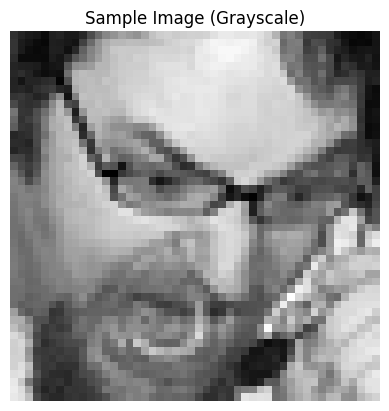

In [5]:
sample_image_path = '/Users/joyziyo/Documents/MasterVAR/Robotics/TP4/archive/test/angry/PrivateTest_10131363.jpg'

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.title("Sample Image (Grayscale)")
plt.axis("off")
plt.show()

In [6]:
def lbp(image, block_size, radius):
    height, width = image.shape
    if height % block_size != 0 or width % block_size:
        print("make sure block size is a divider of image size !")
        return 0
    num_it = int(height / block_size)
    n_points = 8*radius

    lbp_patches =[]

    for i in range (0, num_it):
        for j in range(0,num_it):
            i_index = i*block_size
            j_index = j*block_size
            patch = image[i_index:i_index+block_size, j_index:j_index+block_size]
            lbp_patch = local_binary_pattern(patch, R=radius, P=n_points)
            lbp_patch.ravel
            lbp_hist = np.histogram(lbp_patch, 256)
            lbp_patches.extend(lbp_hist[0])
            
    return lbp_patches 

In [7]:
lbp_image = lbp(image, block_size=12, radius=1) 

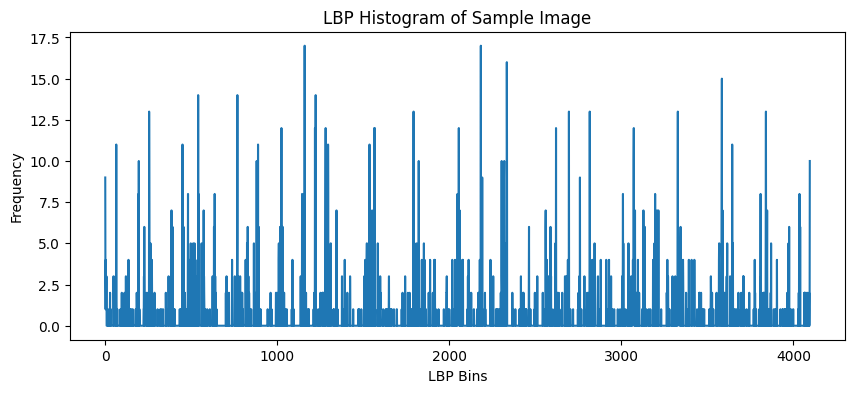

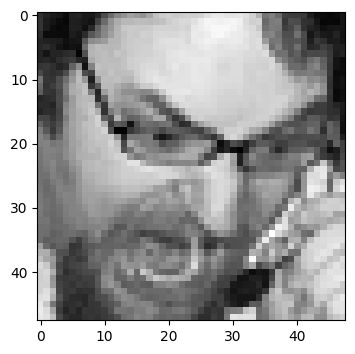

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(lbp_image)
plt.title("LBP Histogram of Sample Image")
plt.xlabel("LBP Bins")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,4))
plt.imshow(image, cmap='gray')
plt.show()


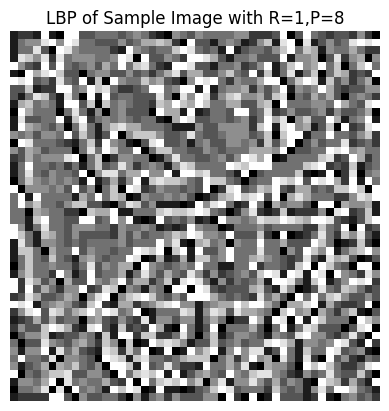

In [9]:
P = 8
R = 1
lbp_image_8 = local_binary_pattern(image, P, R, method='uniform')

plt.imshow(lbp_image_8, cmap='gray')
plt.title("LBP of Sample Image with R=1,P=8")
plt.axis("off")
plt.show()

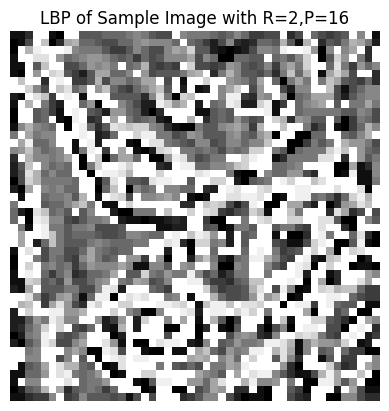

In [ ]:
P = 16
R = 2
lbp_image_16 = local_binary_pattern(image, P, R, method='uniform')

plt.imshow(lbp_image_16, cmap='gray')
plt.title("LBP of Sample Image with R=2,P=16")
plt.axis("off")
plt.show()